In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("Zomato_data.csv")
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [24]:
df.shape

(148, 7)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [26]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

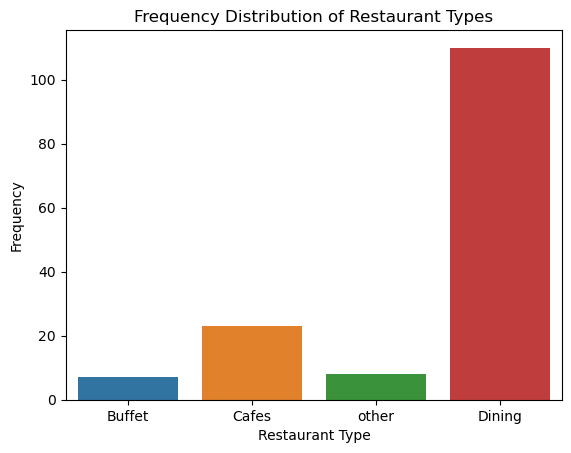

In [27]:
# Let's visualize the frequency of restaurant types in the listed_in(type) column as a bar chart.
sns.countplot(data = df, x = "listed_in(type)");
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Restaurant Types")
plt.show()

Result: The majority of restaurants fall into the Dining category.

In [28]:
# Let's examine the total votes based on restaurant types.
type_restaurant = df.groupby("listed_in(type)")["votes"].sum().reset_index()
type_restaurant

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


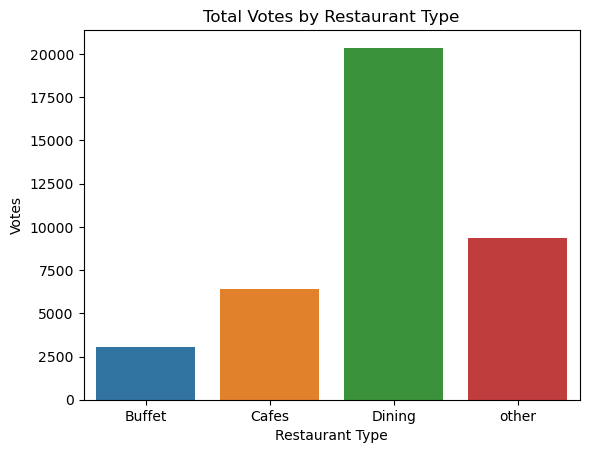

In [29]:
sns.barplot(data = type_restaurant, x = "listed_in(type)", y = "votes");
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.title("Total Votes by Restaurant Type")
plt.show()

Result: Dining restaurants are preferred by more people.

In [30]:
# Let's see how many restaurants have the online ordering feature
df["online_order"].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [31]:
df["online_order"].value_counts(normalize =  True)

online_order
No     0.608108
Yes    0.391892
Name: proportion, dtype: float64

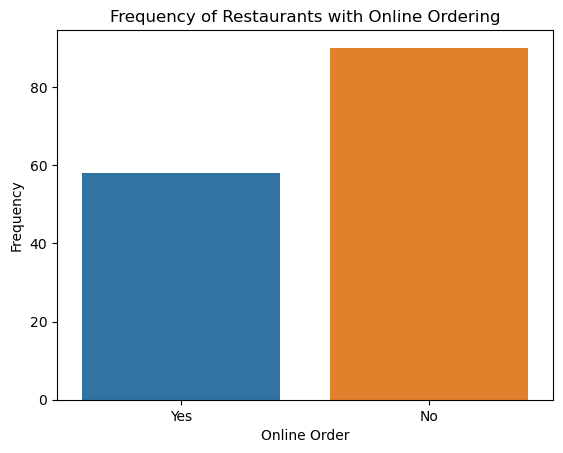

In [32]:
sns.countplot(data = df, x = "online_order");
plt.xlabel("Online Order")
plt.ylabel("Frequency")
plt.title("Frequency of Restaurants with Online Ordering")
plt.show()

Result: This indicates that the majority of restaurants don't accept online orders.

In [34]:
# Converting the 'Rate' category into a numerical value
def convert_rate(x):
    txt = x.split("/")
    return float(txt[0])


df["rate"] = df["rate"].apply(convert_rate)
df["rate"]

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

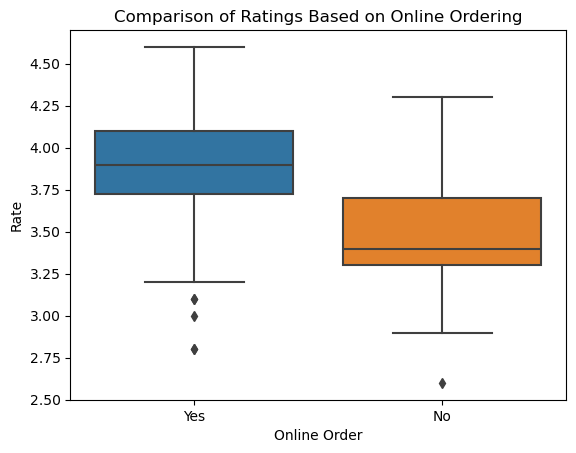

In [35]:
sns.boxplot(data = df, x = "online_order", y = "rate" );
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.title("Comparison of Ratings Based on Online Ordering")
plt.show()

Result: It is observed that establishments with online services tend to have higher ratings.

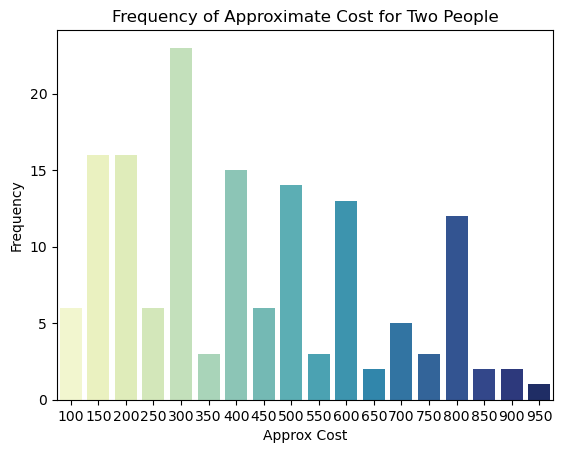

In [37]:
sns.countplot(data = df, x = "approx_cost(for two people)", palette="YlGnBu");
plt.xlabel("Approx Cost")
plt.ylabel("Frequency")
plt.title("Frequency of Approximate Cost for Two People")
plt.show()

Result: The majority of couples choose restaurants with an approximate cost of 300.